6. Object detection using Transfer Learning of CNN architectures
<br>
a. Load in a pre-trained CNN model trained on a large dataset
<br>
b. Freeze parameters (weights) in model’s lower convolutional layers
<br>
c. Add custom classifier with several layers of trainable parameters to model
<br>
d. Train classifier layers on training data available for task
<br>
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#### Pre processing img data 

In [9]:
dataset_dir = "/Users/amanprabhune/Downloads/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


#### Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [10]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [12]:
# Load VGG16 without top layers
weights_path = "/Users/amanprabhune/Downloads/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

2023-11-15 23:10:15.741786: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-15 23:10:15.741860: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-15 23:10:15.741881: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-15 23:10:15.742192: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-15 23:10:15.742673: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [13]:
for layer in base_model.layers:
   layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [14]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-11-15 23:10:21.823641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 6s 166ms/step - loss: 3.8559 - accuracy: 0.2200 - val_loss: 3.3803 - val_accuracy: 0.2930
Epoch 2/10
32/32 [==============================] - 5s 156ms/step - loss: 2.9214 - accuracy: 0.3845 - val_loss: 2.9420 - val_accuracy: 0.3975
Epoch 3/10
32/32 [==============================] - 5s 156ms/step - loss: 2.4265 - accuracy: 0.4740 - val_loss: 2.6439 - val_accuracy: 0.4290
Epoch 4/10
32/32 [==============================] - 5s 157ms/step - loss: 2.0508 - accuracy: 0.5545 - val_loss: 2.4151 - val_accuracy: 0.4715
Epoch 5/10
32/32 [==============================] - 5s 157ms/step - loss: 1.7448 - accuracy: 0.6220 - val_loss: 2.2630 - val_accuracy: 0.5030
Epoch 6/10
32/32 [==============================] - 5s 156ms/step - loss: 1.5162 - accuracy: 0.6705 - val_loss: 2.1483 - val_accuracy: 0.5135
Epoch 7/10
32/32 [==============================] - 5s 156ms/step - loss: 1.3325 - accuracy: 0.7145 - val_loss: 2.0579 - val_accuracy: 0.5315
Epoch 8/10
32/32 

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [16]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-11-15 23:11:45.968740: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


32/32 [==============================] - 6s 175ms/step - loss: 3.5289 - accuracy: 0.3155 - val_loss: 2.5617 - val_accuracy: 0.4535
Epoch 2/10
32/32 [==============================] - 5s 163ms/step - loss: 2.1420 - accuracy: 0.5350 - val_loss: 2.2356 - val_accuracy: 0.5195
Epoch 3/10
32/32 [==============================] - 5s 164ms/step - loss: 1.6980 - accuracy: 0.6075 - val_loss: 2.1466 - val_accuracy: 0.5285
Epoch 4/10
32/32 [==============================] - 5s 163ms/step - loss: 1.2357 - accuracy: 0.6910 - val_loss: 2.1306 - val_accuracy: 0.5655
Epoch 5/10
32/32 [==============================] - 5s 166ms/step - loss: 1.0660 - accuracy: 0.7255 - val_loss: 2.0727 - val_accuracy: 0.5985
Epoch 6/10
32/32 [==============================] - 5s 167ms/step - loss: 0.6695 - accuracy: 0.8205 - val_loss: 2.2208 - val_accuracy: 0.6100
Epoch 7/10
32/32 [==============================] - 5s 164ms/step - loss: 0.4832 - accuracy: 0.8585 - val_loss: 2.3134 - val_accuracy: 0.6130
Epoch 8/10
32/32 

In [17]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 3s 47ms/step


In [18]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  airplanes
Actual:  airplanes


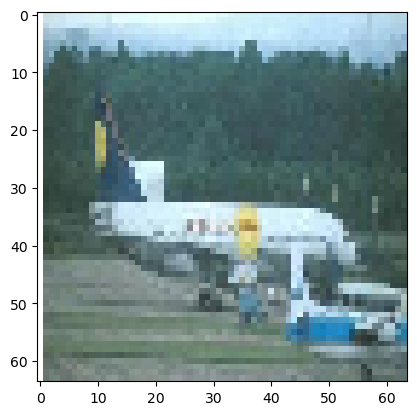

In [19]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])